<Figure size 1800x1200 with 0 Axes>

/workspaces/mictlan/.venv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 10217 (\N{MATHEMATICAL RIGHT ANGLE BRACKET}) missing from font(s) Noto Sans CJK JP.
  func(*args, **kwargs)
/workspaces/mictlan/.venv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8339 (\N{LATIN SUBSCRIPT SMALL LETTER X}) missing from font(s) Noto Sans CJK JP.
  func(*args, **kwargs)
/workspaces/mictlan/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10217 (\N{MATHEMATICAL RIGHT ANGLE BRACKET}) missing from font(s) Noto Sans CJK JP.
  fig.canvas.print_figure(bytes_io, **kw)
/workspaces/mictlan/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8339 (\N{LATIN SUBSCRIPT SMALL LETTER X}) missing from font(s) Noto Sans CJK JP.
  fig.canvas.print_figure(bytes_io, **kw)


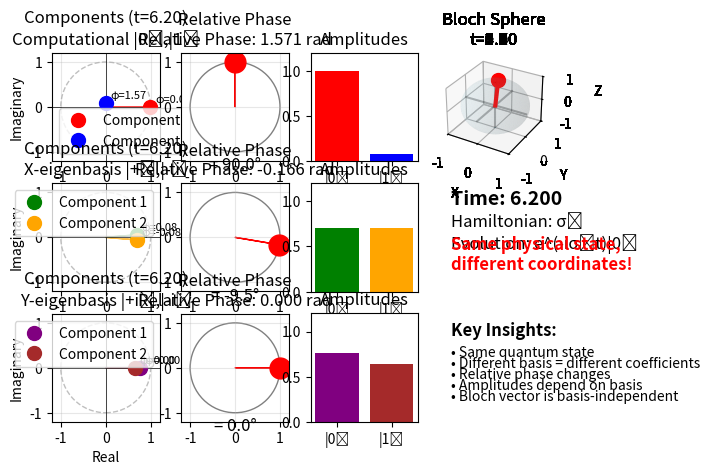

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# === ゲージ自由度と基底依存性の可視化 ===

# 初期状態（物理的には同じ状態）
psi_0 = np.array([1, 0], dtype=np.complex128)  # |0⟩状態

# パウリ行列
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

# 3つの異なる基底を定義
bases = {
    'computational': {
        'name': 'Computational |0⟩,|1⟩',
        'vectors': np.array([[1, 0], [0, 1]]).T,
        'color': ['red', 'blue']
    },
    'plus_minus': {
        'name': 'X-eigenbasis |+⟩,|-⟩', 
        'vectors': np.array([[1, 1], [1, -1]]).T / np.sqrt(2),
        'color': ['green', 'orange']
    },
    'circular': {
        'name': 'Y-eigenbasis |+i⟩,|-i⟩',
        'vectors': np.array([[1, 1j], [1, -1j]]).T / np.sqrt(2),
        'color': ['purple', 'brown']
    }
}

fig = plt.figure(figsize=(18, 12))

# === パート1: 同じ物理状態の異なる表現 ===
def plot_complex_components(ax, coeffs, colors, title, basis_name):
    """複素係数を複素平面上にプロット"""
    ax.clear()
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.axhline(0, color='k', linewidth=0.5)
    ax.axvline(0, color='k', linewidth=0.5)
    
    # 単位円
    circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--', alpha=0.5)
    ax.add_patch(circle)
    
    # 係数をプロット
    for i, (coeff, color) in enumerate(zip(coeffs, colors)):
        ax.plot(coeff.real, coeff.imag, 'o', color=color, markersize=10, 
               label=f'Component {i+1}')
        # 原点からのベクトル
        ax.arrow(0, 0, coeff.real, coeff.imag, head_width=0.05, 
                head_length=0.05, fc=color, ec=color, alpha=0.7)
        # 位相角度を表示
        phase = np.angle(coeff)
        ax.text(coeff.real + 0.1, coeff.imag + 0.1, 
               f'φ={phase:.2f}', fontsize=8)
    
    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginary')
    ax.set_title(f'{title}\n{basis_name}')
    ax.legend()

# === パート2: 相対位相の可視化 ===
def plot_relative_phase(ax, coeffs, title):
    """相対位相を可視化"""
    ax.clear()
    if len(coeffs) >= 2 and abs(coeffs[0]) > 1e-10:
        relative_phase = np.angle(coeffs[1]/coeffs[0])
        
        # 相対位相を単位円上に表示
        ax.plot(np.cos(relative_phase), np.sin(relative_phase), 'ro', markersize=15)
        ax.arrow(0, 0, np.cos(relative_phase), np.sin(relative_phase), 
                head_width=0.1, head_length=0.1, fc='red', ec='red')
        
        circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='-')
        ax.add_patch(circle)
        
        ax.set_xlim(-1.2, 1.2)
        ax.set_ylim(-1.2, 1.2)
        ax.set_aspect('equal')
        ax.grid(True, alpha=0.3)
        ax.set_title(f'{title}\nRelative Phase: {relative_phase:.3f} rad')
        ax.text(0, -1.4, f'= {relative_phase*180/np.pi:.1f}°', ha='center', fontsize=12)

# === パート3: Bloch球表現 ===
def state_to_bloch(psi):
    """状態ベクトルをBloch球座標に変換"""
    if abs(psi[0]) < 1e-10:
        theta = np.pi
        phi = 0
    else:
        theta = 2 * np.arccos(abs(psi[0]))
        phi = np.angle(psi[1]/psi[0]) if abs(psi[0]) > 1e-10 else 0
    
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)  
    z = np.cos(theta)
    return x, y, z

def plot_bloch_sphere(ax, psi, title):
    """Bloch球上に状態をプロット"""
    ax.clear()
    
    # 球面
    u = np.linspace(0, 2 * np.pi, 50)
    v = np.linspace(0, np.pi, 50)
    x_sphere = np.outer(np.cos(u), np.sin(v))
    y_sphere = np.outer(np.sin(u), np.sin(v))
    z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x_sphere, y_sphere, z_sphere, alpha=0.1, color='lightblue')
    
    # 軸
    ax.plot([-1,1], [0,0], [0,0], 'k-', alpha=0.3)
    ax.plot([0,0], [-1,1], [0,0], 'k-', alpha=0.3) 
    ax.plot([0,0], [0,0], [-1,1], 'k-', alpha=0.3)
    
    # 状態ベクトル
    x, y, z = state_to_bloch(psi)
    ax.plot([0, x], [0, y], [0, z], 'r-', linewidth=3)
    ax.plot([x], [y], [z], 'ro', markersize=10)
    
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)

# アニメーション関数
def animate(frame):
    t = frame * 0.1
    
    # 時間発展: e^{-iσ_x t} |ψ⟩
    U = np.cos(t) * np.eye(2) - 1j * np.sin(t) * sigma_x
    psi_t = U @ psi_0
    
    # 各基底での表現を計算
    row = 0
    for basis_key, basis_info in bases.items():
        basis_matrix = basis_info['vectors']
        # 基底変換: 新しい基底での係数
        coeffs = np.linalg.inv(basis_matrix) @ psi_t
        
        # 複素成分プロット
        ax1 = plt.subplot(3, 4, row*4 + 1)
        plot_complex_components(ax1, coeffs, basis_info['color'], 
                              f'Components (t={t:.2f})', basis_info['name'])
        
        # 相対位相プロット  
        ax2 = plt.subplot(3, 4, row*4 + 2)
        plot_relative_phase(ax2, coeffs, f'Relative Phase')
        
        # 振幅プロット
        ax3 = plt.subplot(3, 4, row*4 + 3)
        ax3.clear()
        amplitudes = np.abs(coeffs)
        ax3.bar(range(len(amplitudes)), amplitudes, color=basis_info['color'])
        ax3.set_ylim(0, 1.2)
        ax3.set_title('Amplitudes')
        ax3.set_xticks(range(len(amplitudes)))
        ax3.set_xticklabels([f'|{i}⟩' for i in range(len(amplitudes))])
        
        row += 1
    
    # Bloch球（右端）
    ax_bloch = plt.subplot(3, 4, 4, projection='3d')
    plot_bloch_sphere(ax_bloch, psi_t, f'Bloch Sphere\nt={t:.2f}')
    
    # 全体的な情報
    ax_info = plt.subplot(3, 4, 8)
    ax_info.clear()
    ax_info.text(0.1, 0.8, f'Time: {t:.3f}', fontsize=14, weight='bold')
    ax_info.text(0.1, 0.6, f'Hamiltonian: σₓ', fontsize=12)
    ax_info.text(0.1, 0.4, f'Evolution: e^(-iσₓt)|0⟩', fontsize=12)
    ax_info.text(0.1, 0.2, f'Same physical state,\ndifferent coordinates!', 
                fontsize=12, color='red', weight='bold')
    ax_info.set_xlim(0, 1)
    ax_info.set_ylim(0, 1)
    ax_info.axis('off')
    
    ax_explanation = plt.subplot(3, 4, 12)
    ax_explanation.clear()
    ax_explanation.text(0.1, 0.8, 'Key Insights:', fontsize=12, weight='bold')
    ax_explanation.text(0.1, 0.6, '• Same quantum state', fontsize=10)
    ax_explanation.text(0.1, 0.5, '• Different basis = different coefficients', fontsize=10)
    ax_explanation.text(0.1, 0.4, '• Relative phase changes', fontsize=10)
    ax_explanation.text(0.1, 0.3, '• Amplitudes depend on basis', fontsize=10)
    ax_explanation.text(0.1, 0.2, '• Bloch vector is basis-independent', fontsize=10)
    ax_explanation.set_xlim(0, 1)
    ax_explanation.set_ylim(0, 1)
    ax_explanation.axis('off')

plt.suptitle('Gauge Freedom in C² Space: Same Physics, Different Views', fontsize=16, weight='bold')
plt.tight_layout()

# アニメーション作成
ani = FuncAnimation(fig, animate, frames=63, interval=100, repeat=True)
plt.show()

# HTML5ビデオとして保存
from IPython.display import HTML
HTML(ani.to_html5_video())